In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_curve, auc, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

In [3]:
df = pd.read_csv("../data/sovbanks_replication.csv")

In [4]:
df.columns

Index(['year', 'country', 'iso', 'pop', 'rgdpbarro', 'gdp', 'iy', 'cpi', 'ca',
       'stir', 'ltrate', 'stocks', 'pubgdp', 'crisisJST', 'tloans', 'bassets2',
       'lrgdp', 'lstocks', 'lcpi', 'cay', 'lpop', 'lloans', 'rprv', 'rpub',
       'rtot', 'prvgdp', 'totgdp', 'bassgdp', 'riy', 'lriy', 'dlrgdp', 'dlriy',
       'dlcpi', 'dlrcon', 'drprv', 'drpub', 'ldrprv', 'ldrpub', 'ldlrgdp',
       'ldlcpi', 'ldlriy', 'lstir', 'lltrate', 'lcay', 'pk_nber', 'th_nber',
       'rcn_nber', 'war', 'bb', 'rcn_bb', 'pk_bb', 'th_bb', 'pk_norm',
       'pk_fin', 'pk_glob', 'pk_comb', 'ar_lrgdp_bb', 'ax_lrgdp_bb',
       'dr_lrgdp_bb', 'dx_lrgdp_bb', 'rr_lrgdp_bb', 'rx_lrgdp_bb',
       'ar_rprv_bb', 'ax_rprv_bb', 'dr_rprv_bb', 'dx_rprv_bb', 'rr_rprv_bb',
       'rx_rprv_bb', 'ar_rpub_bb', 'ax_rpub_bb', 'dr_rpub_bb', 'dx_rpub_bb',
       'rr_rpub_bb', 'rx_rpub_bb', 'ccode', 'ar_rtot_bb', 'ax_rtot_bb',
       'dr_rtot_bb', 'dx_rtot_bb', 'rr_rtot_bb', 'rx_rtot_bb', 'srx_prv',
       'srx_pub', 'f1war',

In [5]:
df["country"].unique()

array(['Australia', 'Belgium', 'Canada', 'Switzerland', 'Germany',
       'Denmark', 'Spain', 'Finland', 'France', 'UK', 'Italy', 'Japan',
       'Netherlands', 'Norway', 'Portugal', 'Sweden', 'USA'], dtype=object)

# Data Describtion

In [6]:
df.describe()

,year,pop,rgdpbarro,gdp,iy,cpi,ca,stir,ltrate,stocks,pubgdp,crisisJST,tloans,bassets2,lrgdp,lstocks,lcpi,cay,lpop,lloans,rprv,rpub,rtot,prvgdp,totgdp,bassgdp,riy,lriy,dlrgdp,dlriy,dlcpi,dlrcon,drprv,drpub,ldrprv,ldrpub,ldlrgdp,ldlcpi,ldlriy,lstir,lltrate,lcay,pk_nber,th_nber,rcn_nber,war,bb,rcn_bb,pk_bb,th_bb,pk_norm,pk_fin,pk_glob,pk_comb,ar_lrgdp_bb,ax_lrgdp_bb,dr_lrgdp_bb,dx_lrgdp_bb,rr_lrgdp_bb,rx_lrgdp_bb,ar_rprv_bb,ax_rprv_bb,dr_rprv_bb,dx_rprv_bb,rr_rprv_bb,rx_rprv_bb,ar_rpub_bb,ax_rpub_bb,dr_rpub_bb,dx_rpub_bb,rr_rpub_bb,rx_rpub_bb,ccode,ar_rtot_bb,ax_rtot_bb,dr_rtot_bb,dx_rtot_bb,rr_rtot_bb,rx_rtot_bb,srx_prv,srx_pub,f1war,l1war,f2war,l2war,f3war,f4war,f5war,war5f2l,core
count,2431.000000,2431.000000,2431.000000,2.307000e+03,2199.000000,2.405000e+03,2.276000e+03,2180.000000,2396.000000,2.123000e+03,2207.000000,2431.000000,2.230000e+03,1.994000e+03,2431.000000,2123.000000,2405.000000,2215.000000,2431.000000,2230.000000,2223.000000,2144.000000,2005.000000,2144.000000,2005.000000,1944.000000,2199.000000,2199.000000,2414.000000,2167.000000,2385.000000,2295.000000,2197.000000,2103.000000,2180.000000,2103.000000,2397.000000,2368.000000,2150.000000,2163.000000,2379.000000,2198.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.0,2431.000000,2431.000000,2414.000000,2431.000000,2414.000000,374.000000,360.000000,2381.000000,2362.000000,2431.000000,2414.000000,324.000000,308.000000,2367.000000,2357.000000,2431.000000,2414.000000,310.000000,303.000000,2431.000000,2334.000000,2323.000000,2431.000000,2414.000000,277.000000,269.000000,294.000000,315.000000,2414.000000,2414.000000,2397.000000,2397.000000,2380.000000,2363.000000,2346.000000,2431.000000,1887.0
mean,1941.000000,31603.936572,35.326759,1.868231e+06,0.183208,3.439556e+01,-6.774904e+04,500.403631,561.258485,6.763956e+07,0.535992,0.039079,2.140741e+06,1.917321e+06,3.192416,1.759333,1.335195,-0.619572,9.601246,5.974397,-5.261447,-5.252421,-10.494969,0.565138,1.086825,0.847252,7.772707,1.501555,1.795841,2.343536,4.737673,1.649713,3.845598,2.699792,3.879714,2.699792,1.808618,4.758388,2.370553,503.595002,563.284626,-0.639104,0.195804,0.195804,0.300699,0.104895,3.192416,0.248457,0.155080,0.153846,0.116413,0.034142,0.0,0.150555,-0.009484,0.027209,0.248457,0.741508,-0.032277,0.037998,0.000572,0.033097,0.248457,0.741508,0.014007,0.037522,0.006362,0.015348,0.248457,0.741508,0.023158,0.026301,9.000000,0.008902,0.038960,0.248457,0.741508,0.044462,0.057078,-0.029830,-0.520946,0.105634,0.105634,0.106383,0.106383,0.107143,0.107914,0.108696,0.202797,1.0
std,41.288028,44204.717726,29.845474,1.291277e+07,0.062768,4.886266e+01,7.855502e+05,344.943991,297.732083,3.116552e+09,0.387579,0.193822,1.843465e+07,1.076369e+07,0.883621,5.284985,4.608187,4.416071,1.249080,6.682414,4.648754,4.660035,9.219970,0.356228,0.466449,0.636514,7.166314,1.134239,5.438663,14.280253,44.049604,5.637058,10.943333,12.200914,10.968863,12.200914,5.454379,44.206716,14.324997,344.316713,297.141961,4.399420,0.396900,0.396900,0.458656,0.306481,0.883621,0.432207,0.362056,0.360875,0.320786,0.181632,0.0,0.357688,0.050131,0.116799,0.702708,2.735070,0.040594,0.024839,0.074964,0.202995,0.702708,2.735070,0.095044,0.098909,0.077996,0.138861,0.702708,2.735070,0.128289,0.105963,4.899987,0.091117,0.230233,0.702708,2.735070,0.152627,0.122324,3.268427,5.979726,0.307432,0.307432,0.308392,0.308392,0.309360,0.310337,0.311323,0.402165,0.0
min,1870.000000,1675.000000,3.147400,1.670000e-11,0.017287,1.150362e-11,-1.757142e+07,-2.000000,56.000000,4.342073e-14,0.019341,0.000000,4.920143e-12,6.732343e-12,1.146577,-30.767839,-25.188360,-21.039423,7.423568,-26.037683,-19.257523,-14.849414,-30.327522,0.019497,0.270271,0.054977,0.229947,-1.469906,-108.071990,-160.218770,-49.384331,-55.715824,-143.330520,-94.269302,-143.330520,-94.269302,-108.071990,-49.384331,-160.218770,0.085083,74.000000,-21.039423,0.000000,0.000000,0.000000,0.000000,1.146577,0.000000,0.000000,0.000000,

In [7]:
df

,year,country,iso,pop,rgdpbarro,gdp,iy,cpi,ca,stir,ltrate,stocks,pubgdp,crisisJST,tloans,bassets2,lrgdp,lstocks,lcpi,cay,lpop,lloans,rprv,rpub,rtot,prvgdp,totgdp,bassgdp,riy,lriy,dlrgdp,dlriy,dlcpi,dlrcon,drprv,drpub,ldrprv,ldrpub,ldlrgdp,ldlcpi,ldlriy,lstir,lltrate,lcay,pk_nber,th_nber,rcn_nber,war,bb,rcn_bb,pk_bb,th_bb,pk_norm,pk_fin,pk_glob,pk_comb,ar_lrgdp_bb,ax_lrgdp_bb,dr_lrgdp_bb,dx_lrgdp_bb,rr_lrgdp_bb,rx_lrgdp_bb,ar_rprv_bb,ax_rprv_bb,dr_rprv_bb,dx_rprv_bb,rr_rprv_bb,rx_rprv_bb,ar_rpub_bb,ax_rpub_bb,dr_rpub_bb,dx_rpub_bb,rr_rpub_bb,rx_rpub_bb,ccode,ar_rtot_bb,ax_rtot_bb,dr_rtot_bb,dx_rtot_bb,rr_rtot_bb,rx_rtot_bb,srx_prv,srx_pub,f1war,l1war,f2war,l2war,f3war,f4war,f5war,war5f2l,core
0,1870,Australia,AUS,1775.000000,13.6702,163.4,0.109266,2.708333,-22.080000,488.00,487.800,0.031616,NaN,0,54.7920,NaN,2.615218,-3.454099,0.996333,-13.512852,7.481556,4.003544,-4.474345,NaN,NaN,0.335324,NaN,NaN,1.493683,0.401245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2.615218,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,1,0.000000,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0,1.0
1,1871,Australia,AUS,1675.000000,13.7697,156.8,0.104579,2.666667,-6.640000,460.00,467.290,0.077171,NaN,0,53.7480,NaN,2.622471,-2.561734,0.980829,-4.234694,7.423568,3.984307,-4.420091,NaN,NaN,0.342781,NaN,NaN,1.440023,0.364659,0.725245,-3.658569,-1.550394,NaN,5.425358,NaN,NaN,NaN,NaN,NaN,NaN,488.00,487.79999,-13.512852,0,0,0,0,2.622471,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,1,0.000000,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,1.0
2,1872,Australia,AUS,1722.000000,14.8638,187.2,0.130438,2.541667,-6.920000,460.00,469.480,0.085715,NaN,0,55.8220,NaN,2.698929,-2.456727,0.932820,-3.696581,7.451242,4.022168,-4.361894,NaN,NaN,0.298194,NaN,NaN,1.938804,0.662071,7.645822,29.741251,-4.800921,NaN,5.819750,NaN,5.425358,NaN,0.725245,-1.550394,-3.658569,460.00,467.29001,-4.234694,0,0,0,0,2.698929,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,1,0.000000,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
3,1873,Australia,AUS,1769.000000,16.0249,217.4,0.124986,2.541667,-24.820000,440.00,471.700,0.097623,NaN,0,65.3800,81.7520,2.774144,-2.326639,0.932820,-11.416743,7.478170,4.180216,-4.230774,NaN,NaN,0.300736,NaN,0.376044,2.002891,0.694592,7.521486,3.252029,0.000000,NaN,13.111973,NaN,5.819750,NaN,7.645822,-4.800921,29.741251,460.00,469.48001,-3.696581,1,0,0,0,2.774144,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,1,0.000000,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,1874,Australia,AUS,1822.000000,16.0731,219.4,0.141960,2.666667,-19.020000,450.00,460.830,0.101105,NaN,0,71.4780,88.3940,2.777147,-2.291591,0.980829,-8.669098,7.507690,4.269390,-4.219130,NaN,NaN,0.325789,NaN,0.402890,2.281736,0.824936,0.300336,13.034463,4.800921,NaN,1.164436,NaN,13.111973,NaN,7.521486,0.000000,3.252029,440.00,471.70001,-11.416743,0,0,1,0,2.777147,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,0.000000,0.0,0,0.0,NaN,NaN,1,0.000000,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2008,USA,USA,304228.000000,100.5119,14720.3,0.210015,165.888792,-681.402687,146.00,366.667,877.560000,0.697,0,7063.0581,14982.2002,4.610276,6.777145,5.111318,-4.629000,12.625533,8.862634,-8.874217,-8.500838,-17.375055,0.479818,1.176818,1.017792,21.109056,3.049702,-0.515985,-5.653954,3.744030,-1.128292,-2.212048,4.524517,3.241539,0.343704,1.026583,4.036427,-2.

## Crisis Observations

In [8]:
df[df["crisisJST"] == 1]

,year,country,iso,pop,rgdpbarro,gdp,iy,cpi,ca,stir,ltrate,stocks,pubgdp,crisisJST,tloans,bassets2,lrgdp,lstocks,lcpi,cay,lpop,lloans,rprv,rpub,rtot,prvgdp,totgdp,bassgdp,riy,lriy,dlrgdp,dlriy,dlcpi,dlrcon,drprv,drpub,ldrprv,ldrpub,ldlrgdp,ldlcpi,ldlriy,lstir,lltrate,lcay,pk_nber,th_nber,rcn_nber,war,bb,rcn_bb,pk_bb,th_bb,pk_norm,pk_fin,pk_glob,pk_comb,ar_lrgdp_bb,ax_lrgdp_bb,dr_lrgdp_bb,dx_lrgdp_bb,rr_lrgdp_bb,rx_lrgdp_bb,ar_rprv_bb,ax_rprv_bb,dr_rprv_bb,dx_rprv_bb,rr_rprv_bb,rx_rprv_bb,ar_rpub_bb,ax_rpub_bb,dr_rpub_bb,dx_rpub_bb,rr_rpub_bb,rx_rpub_bb,ccode,ar_rtot_bb,ax_rtot_bb,dr_rtot_bb,dx_rtot_bb,rr_rtot_bb,rx_rtot_bb,srx_prv,srx_pub,f1war,l1war,f2war,l2war,f3war,f4war,f5war,war5f2l,core
23,1893,Australia,AUS,3334.0,15.5462,301.300000,0.111523,2.625000,-7.780000,420.000000,384.620,0.163587,1.119570,1,235.1840,280.8640,2.743816,-1.810410,0.965081,-2.582144,8.111928,5.460368,-3.616641,-3.255958,-6.872599,0.780564,1.900134,0.932174,1.733757,0.550291,-7.611537,-27.971565,-3.125238,NaN,-9.361601,5.805922,-1.875472,2.812481,-15.935636,-1.526767,-51.682396,430.00000,380.95001,-8.261809,1,0,0,0,2.743816,1,0,1,0,0,0,0,-0.235472,0.000000,2,0.0,-0.117736,NaN,-0.112371,0.000000,2,0.0,-0.056185,NaN,0.086184,0.000000,2,0.0,0.043092,NaN,1,-0.026187,0.000000,2,0.0,-0.013093,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
119,1989,Australia,AUS,16681.0,71.5426,388964.000000,0.280880,93.220740,-22607.760000,1514.166667,1340.830,34.635800,0.228300,1,174395.1965,308548.3000,4.270293,3.544888,4.534970,-5.812302,9.722026,12.069079,-2.187917,-2.862849,-5.050765,0.448358,0.676658,0.793257,20.094864,3.000464,2.203226,5.819702,7.287312,3.451252,28.291225,-6.335735,15.049601,13.265848,2.353907,6.982279,3.810096,1217.50000,1210.42000,-4.319623,0,0,0,0,4.270293,0,1,0,0,1,0,1,0.000000,0.195417,0,7.0,NaN,0.027917,0.000000,0.850997,0,7.0,NaN,0.121571,0.000000,0.410302,0,7.0,NaN,0.058615,1,0.000000,1.261300,0,7.0,NaN,0.180186,3.255947,0.769886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
143,1870,Belgium,BEL,5096.0,9.6856,4518.980513,NaN,0.712070,-231.000000,338.356164,402.000,99.000000,0.151140,1,NaN,NaN,2.270640,4.595120,-0.339579,-5.111772,8.536211,NaN,NaN,-1.670139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2.270640,0,1,0,0,1,0,1,0.000000,NaN,0,NaN,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,0.000000,NaN,0,NaN,NaN,NaN,2,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0,1.0
158,1885,Belgium,BEL,5876.0,11.3070,4925.756208,NaN,0.627468,-147.000000,323.972603,340.000,84.000000,0.359739,1,1405.5861,409.7341,2.425422,4.430817,-0.466063,-2.984313,8.678632,7.248209,-0.964359,-0.732712,-1.697071,0.285354,0.645093,0.083182,NaN,NaN,0.055718,NaN,-3.315219,NaN,NaN,2.358478,NaN,6.343722,-0.272179,-7.333130,NaN,327.26028,356.00000,-1.742770,0,1,1,0,2.425422,0,0,0,0,0,0,0,0.000000,0.000000,0,0.0,NaN,NaN,0.000000,0.000000,0,0.0,NaN,NaN,0.000000,0.000000,0,0.0,NaN,NaN,2,0.000000,0.000000,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
198,1925,Belgium,BEL,7779.0,18.5225,44716.556207,0.165000,3.652002,-3074.000000,569.000000,581.000,251.000000,1.162580,1,15796.0000,18763.6465,2.918986,5.525453,1.295276,-6.874412,8.959183,9.667512,-0.586946,0.604282,0.017336,0.353247,1.515827,0.419613,3.056212,1.117176,0.129676,-8.014381,3.336918,-0.268841,22.769249,11.805037,-12.493682,-17.285839,4.317069,15.748286,-1.119053,550.00000,540.00000,-9.039461,0,0,0,0,2.918986,0,0,0,0,0,0,0,0.000000,0.000000,0,0.0,NaN,NaN,0.000000,0.000000,0,0.0,NaN,NaN,0.000000,0.000000,0,0.0,NaN,NaN,2,0.000000,0.000000,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,1893,USA,USA,67231

# Preprocessing

In [9]:
df = df.drop(columns=['rr_lrgdp_bb', 'rx_lrgdp_bb', 'srx_prv', 'rr_rprv_bb',
                      'rx_rprv_bb', 'rr_rpub_bb', 'rx_rpub_bb', 'srx_pub',
                      'rr_rtot_bb', 'rx_rtot_bb', 'f1war', 'l1war', 'f2war',
                      'l2war', 'f3war', 'f4war', 'f5war', 'war5f2l', 'core'])

In [10]:
df

,year,country,iso,pop,rgdpbarro,gdp,iy,cpi,ca,stir,ltrate,stocks,pubgdp,crisisJST,tloans,bassets2,lrgdp,lstocks,lcpi,cay,lpop,lloans,rprv,rpub,rtot,prvgdp,totgdp,bassgdp,riy,lriy,dlrgdp,dlriy,dlcpi,dlrcon,drprv,drpub,ldrprv,ldrpub,ldlrgdp,ldlcpi,ldlriy,lstir,lltrate,lcay,pk_nber,th_nber,rcn_nber,war,bb,rcn_bb,pk_bb,th_bb,pk_norm,pk_fin,pk_glob,pk_comb,ar_lrgdp_bb,ax_lrgdp_bb,dr_lrgdp_bb,dx_lrgdp_bb,ar_rprv_bb,ax_rprv_bb,dr_rprv_bb,dx_rprv_bb,ar_rpub_bb,ax_rpub_bb,dr_rpub_bb,dx_rpub_bb,ccode,ar_rtot_bb,ax_rtot_bb,dr_rtot_bb,dx_rtot_bb
0,1870,Australia,AUS,1775.000000,13.6702,163.4,0.109266,2.708333,-22.080000,488.00,487.800,0.031616,NaN,0,54.7920,NaN,2.615218,-3.454099,0.996333,-13.512852,7.481556,4.003544,-4.474345,NaN,NaN,0.335324,NaN,NaN,1.493683,0.401245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2.615218,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,1,0.000000,0.0,0,0.0
1,1871,Australia,AUS,1675.000000,13.7697,156.8,0.104579,2.666667,-6.640000,460.00,467.290,0.077171,NaN,0,53.7480,NaN,2.622471,-2.561734,0.980829,-4.234694,7.423568,3.984307,-4.420091,NaN,NaN,0.342781,NaN,NaN,1.440023,0.364659,0.725245,-3.658569,-1.550394,NaN,5.425358,NaN,NaN,NaN,NaN,NaN,NaN,488.00,487.79999,-13.512852,0,0,0,0,2.622471,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,1,0.000000,0.0,0,0.0
2,1872,Australia,AUS,1722.000000,14.8638,187.2,0.130438,2.541667,-6.920000,460.00,469.480,0.085715,NaN,0,55.8220,NaN,2.698929,-2.456727,0.932820,-3.696581,7.451242,4.022168,-4.361894,NaN,NaN,0.298194,NaN,NaN,1.938804,0.662071,7.645822,29.741251,-4.800921,NaN,5.819750,NaN,5.425358,NaN,0.725245,-1.550394,-3.658569,460.00,467.29001,-4.234694,0,0,0,0,2.698929,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,1,0.000000,0.0,0,0.0
3,1873,Australia,AUS,1769.000000,16.0249,217.4,0.124986,2.541667,-24.820000,440.00,471.700,0.097623,NaN,0,65.3800,81.7520,2.774144,-2.326639,0.932820,-11.416743,7.478170,4.180216,-4.230774,NaN,NaN,0.300736,NaN,0.376044,2.002891,0.694592,7.521486,3.252029,0.000000,NaN,13.111973,NaN,5.819750,NaN,7.645822,-4.800921,29.741251,460.00,469.48001,-3.696581,1,0,0,0,2.774144,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,1,0.000000,0.0,0,0.0
4,1874,Australia,AUS,1822.000000,16.0731,219.4,0.141960,2.666667,-19.020000,450.00,460.830,0.101105,NaN,0,71.4780,88.3940,2.777147,-2.291591,0.980829,-8.669098,7.507690,4.269390,-4.219130,NaN,NaN,0.325789,NaN,0.402890,2.281736,0.824936,0.300336,13.034463,4.800921,NaN,1.164436,NaN,13.111973,NaN,7.521486,0.000000,3.252029,440.00,471.70001,-11.416743,0,0,1,0,2.777147,0,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,1,0.000000,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2008,USA,USA,304228.000000,100.5119,14720.3,0.210015,165.888792,-681.402687,146.00,366.667,877.560000,0.697,0,7063.0581,14982.2002,4.610276,6.777145,5.111318,-4.629000,12.625533,8.862634,-8.874217,-8.500838,-17.375055,0.479818,1.176818,1.017792,21.109056,3.049702,-0.515985,-5.653954,3.744030,-1.128292,-2.212048,4.524517,3.241539,0.343704,1.026583,4.036427,-2.255774,441.00,462.91699,-4.905276,0,1,1,0,4.610276,1,0,0,0,0,0,0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,0.000000,0.0,0,0.0,17,0.000000,0.0,0,0.0
2427,2009,USA,USA,306879.729035,97.2235,14417.9,0.185374,165.357947,-381.641813,16.00,325.667,1110.380000,0.851,0,6486.2573,NaN,4.577013,7.012457,5.108112,-2.647000,12.634212,8.777441,-8.964883,-8.327441,-17.292324,0.449875,1.300875,NaN,18.022684,2.891631,-3.326368,-15.807104,-0.320530,-1.469612,-9.066582,17.339706,-2.212048,4.524517,-0.515985,3.744030,-5.653954,146.00,366.66699,-4.629000,0,0,0,0,4.577013,1,0,1,0,0,0,0,-0.038424,0.0,2,0.0,-0.112786,0.0,2,0.0,

In [11]:
X = df.drop(columns=["crisisJST", "country", "iso"]).to_numpy()
y = df["crisisJST"].to_numpy()

## Missing Values

In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)

SimpleImputer()

In [13]:
X = imp.transform(X)

# Classification / Prediction
- Classification Tree
- Random Forest
- Logistic Regression

In [14]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
split = sss.split(X, y)

## Classification Tree

In [15]:
classifier = DecisionTreeClassifier(random_state=0)

In [16]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

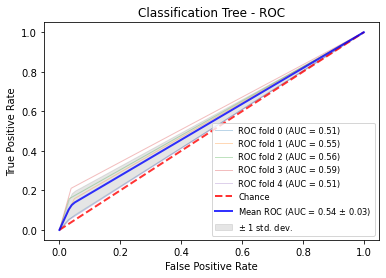

In [17]:
fig, ax = plt.subplots()
for i, (train, test) in enumerate(sss.split(X, y)):
    
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Classification Tree - ROC",
)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.legend(fontsize="small")
plt.show()

## Logistic Regession

In [18]:
classifier = LogisticRegression(random_state=42, max_iter=1000, C=0.8)

In [19]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

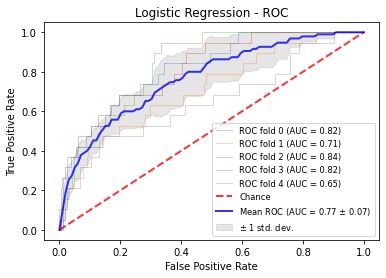

In [20]:
fig, ax = plt.subplots()
for i, (train, test) in enumerate(sss.split(X, y)):
    sc = StandardScaler().fit(X[train])
    
    classifier.fit(sc.transform(X[train]), y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        sc.transform(X[test]),
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Logistic Regression - ROC",
)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
plt.legend(fontsize="small")
plt.show()

In [21]:
lr_tpr = mean_tpr
lr_fpr = mean_fpr
lr_auc = mean_auc

## Random Forest

In [22]:
cte = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=1000)
cte.fit(X, y)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42)

In [23]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

i = "cte"
fpr[i], tpr[i], _ = roc_curve(y, cte.oob_decision_function_[:, 1], pos_label=1)
roc_auc[i] = auc(fpr[i], tpr[i])

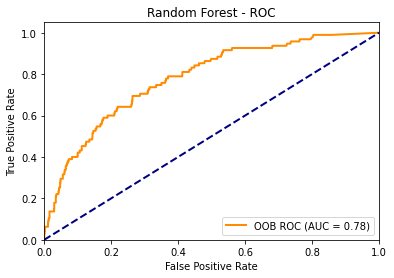

In [24]:
plt.figure()
lw = 2
plt.plot(
    fpr["cte"],
    tpr["cte"],
    color="darkorange",
    lw=lw,
    label="OOB ROC (AUC = %0.2f)" % roc_auc["cte"],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC")
plt.legend(loc="lower right")
plt.show()

# Comparison

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

i = "cte"
fpr[i], tpr[i], _ = roc_curve(y, cte.oob_decision_function_[:, 1], pos_label=1)
roc_auc[i] = auc(fpr[i], tpr[i])

i = "lr"
fpr[i], tpr[i] = lr_fpr, lr_tpr
roc_auc[i] = lr_auc

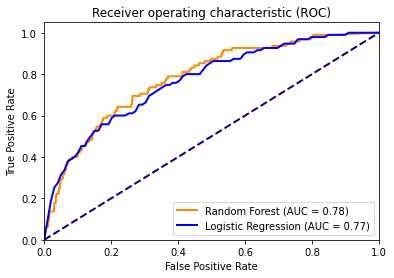

In [26]:
plt.figure()
lw = 2
plt.plot(
    fpr["cte"],
    tpr["cte"],
    color="darkorange",
    lw=lw,
    label="Random Forest (AUC = %0.2f)" % roc_auc["cte"],
)
plt.plot(
    fpr["lr"],
    tpr["lr"],
    color="blue",
    lw=lw,
    label="Logistic Regression (AUC = %0.2f)" % roc_auc["lr"],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()